# **Load, Structure of Data and Summary Statistics**

**Necessary Python Packages and Libraries are loaded for further analysis**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import sklearn.ensemble
import sklearn.tree
import pandas as pd
import datetime
import plotly
import plotly.express as px
import sklearn
import sklearn.model_selection
import sklearn.linear_model
sns.set_style('whitegrid')
%load_ext cython

In [ ]:
data = pd.read_csv('/content/takehome_ds_written_.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data['time'] = pd.to_datetime(data['time'])


**Displayed Both Top and Bottom rows of the data to have a better look on the structure and attributes before doing any data analysis**

In [ ]:
data.head()

merchant                time  amount_usd_in_cents
0  faa029c6b0 2034-06-17 23:34:14                 6349
1  ed7a7d91aa 2034-12-27 00:40:38                 3854
2  5608f200cf 2034-04-30 01:29:42                  789
3  15b1a0d61e 2034-09-16 01:06:23                 4452
4  4770051790 2034-07-22 16:21:42                20203

**Shape represents the Dimensions like a Matrix**

**Number of Records = 1513719**

**Number of Attributes/Columns = 3**

In [ ]:
data.shape

(1513719, 3)

In [ ]:
#Normalization for better interpretability
data['amount_usd_in_cents'] = data['amount_usd_in_cents']/100


In [ ]:
data.head()

merchant                time  amount_usd_in_cents
0  faa029c6b0 2034-06-17 23:34:14                63.49
1  ed7a7d91aa 2034-12-27 00:40:38                38.54
2  5608f200cf 2034-04-30 01:29:42                 7.89
3  15b1a0d61e 2034-09-16 01:06:23                44.52
4  4770051790 2034-07-22 16:21:42               202.03

In [ ]:
data.tail(5)

merchant                time  amount_usd_in_cents
1513714  72d37bedbf 2034-06-21 13:47:51                52.74
1513715  5608f200cf 2034-04-20 02:23:59                 7.54
1513716  fcbd1dae68 2033-09-19 14:02:33               132.03
1513717  9843e52410 2034-12-28 20:07:59                48.45
1513718  32acddd6cc 2034-08-23 09:07:07                38.62

**Some Basic Information about the dataset which includes the Type of columns it has, number of columns and total number of records**

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513719 entries, 0 to 1513718
Data columns (total 3 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   merchant             1513719 non-null  object        
 1   time                 1513719 non-null  datetime64[ns]
 2   amount_usd_in_cents  1513719 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 34.6+ MB


In [ ]:
data.columns

Index(['merchant', 'time', 'amount_usd_in_cents'], dtype='object')

**Describe helps in Analyzing the data at a glance** 

In [ ]:
data.describe()


amount_usd_in_cents
count         1.513719e+06
mean          1.548466e+02
std           6.161886e+02
min           2.010000e+00
25%           3.215000e+01
50%           6.104000e+01
75%           1.260600e+02
max           2.592028e+05

**Checking for Null values in data, because either these are filled with an appropriate value with respect to each column or completely removed from the dataset, depending on a given use case** 

In [ ]:
data.replace('', np.nan, inplace=True)
data.isnull().sum()

merchant               0
time                   0
amount_usd_in_cents    0
dtype: int64

**Unique Values in each attribute also helps explore the structure of the dataset**

In [ ]:
data.nunique()

merchant                 14351
time                   1479950
amount_usd_in_cents      94094
dtype: int64

In [ ]:
data.dtypes

merchant                       object
time                   datetime64[ns]
amount_usd_in_cents           float64
dtype: object

**But never forgets about the most important attribute of any given dataset, which can be a label in a classification problem or a continuous value in regression analysis. In clustering it depends on the use case that which attributes are important to look around for. Here we will develop numerous features**

In [ ]:
data = data[data['amount_usd_in_cents'] < 20_000]

In [ ]:
data.shape

(1513606, 3)

**As it is clearly a Time-Series Data of Merchant Transactions with given amount, Feature Engineering is very important for further Analysis**

#### **Feature Engineering with**:
- **L (Length): Difference of days between a customer’s first and last visit is referred to as length in the LRFMV model**
- **R (Recency): Number of days since last purchase**
- **F (Frequency): Number of transactions**
- **M (Monetary): Total amount of transactions (revenue contributed)**

# Length

In [ ]:
# Adding New Features LRFM
# New Attribute : Length

rfm_l = data.groupby(['merchant'])['time'].max().reset_index()
rfm_l.columns = ['merchant', 'date_max']
rfm_l.head()

merchant            date_max
0  0002b63b92 2033-05-16 20:07:57
1  0002d07bba 2034-12-15 09:56:19
2  00057d4302 2033-08-04 04:26:40
3  000bcff341 2033-08-09 20:18:36
4  000ddbf0ca 2033-06-02 13:25:12

In [ ]:
rfm_l.shape

(14349, 2)

In [ ]:
rfm_l2 = data.groupby(['merchant'])['time'].min().reset_index()
rfm_l2.columns = ['merchant', 'date_min']
rfm_l2.head()

merchant            date_min
0  0002b63b92 2033-05-16 20:07:57
1  0002d07bba 2034-10-11 17:02:26
2  00057d4302 2033-05-30 01:30:52
3  000bcff341 2033-08-09 20:18:36
4  000ddbf0ca 2033-06-02 13:25:12

In [ ]:
rfm_l2['length'] = rfm_l['date_max'] - rfm_l2['date_min']

In [ ]:
rfm_l2 = rfm_l2.reset_index()
rfm_l2['length'] = rfm_l2['length'].dt.days.astype(int)
rfm_l2['length'] = rfm_l2['length'] + 1

In [ ]:
rfm_l2.head()

index    merchant            date_min  length
0      0  0002b63b92 2033-05-16 20:07:57       1
1      1  0002d07bba 2034-10-11 17:02:26      65
2      2  00057d4302 2033-05-30 01:30:52      67
3      3  000bcff341 2033-08-09 20:18:36       1
4      4  000ddbf0ca 2033-06-02 13:25:12       1

In [ ]:
rfm_l2 = rfm_l2.drop(columns = ['index', 'date_min'])

In [ ]:
rfm_l2.head()

merchant  length
0  0002b63b92       1
1  0002d07bba      65
2  00057d4302      67
3  000bcff341       1
4  000ddbf0ca       1

In [ ]:
rfm_l2.shape

(14349, 2)

# Monetary

In [ ]:
# New Attribute : Monetary

rfm_m = data.groupby('merchant')['amount_usd_in_cents'].sum() 
rfm_m = rfm_m.reset_index()
rfm_m.columns = ['merchant', 'monetary']
rfm_m.head()

merchant  monetary
0  0002b63b92     33.79
1  0002d07bba    892.78
2  00057d4302    295.21
3  000bcff341     78.26
4  000ddbf0ca    102.99

In [ ]:
rfm_m.shape

(14349, 2)

In [ ]:
rfm_m['monetary_per_day'] = rfm_m['monetary']/rfm_l2['length']

In [ ]:
rfm_m = rfm_m.drop(columns = ['monetary'])

# Frequency

In [ ]:
# New Attribute : Frequency

rfm_f = data.groupby('merchant')['amount_usd_in_cents'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['merchant', 'Frequency']
rfm_f.head()

merchant  Frequency
0  0002b63b92          1
1  0002d07bba          4
2  00057d4302         28
3  000bcff341          1
4  000ddbf0ca          1

In [ ]:
rfm_f['frequency_per_day'] = rfm_f['Frequency']/rfm_l2['length']

In [ ]:
rfm_f = rfm_f.drop(columns = ['Frequency'])

# Recency

In [ ]:
# New Attribute : Recency

# Compute the maximum date to know the last transaction date

min_date = min(data['time'])

In [ ]:
rfm_r = data.groupby(['merchant'])['time'].max().reset_index()
rfm_r.columns = ['merchant', 'date_max']
rfm_r.head()

merchant            date_max
0  0002b63b92 2033-05-16 20:07:57
1  0002d07bba 2034-12-15 09:56:19
2  00057d4302 2033-08-04 04:26:40
3  000bcff341 2033-08-09 20:18:36
4  000ddbf0ca 2033-06-02 13:25:12

In [ ]:
rfm_r['recency'] = [(date-min_date).days for date in list(rfm_r['date_max'])]
rfm_r.head()

merchant            date_max  recency
0  0002b63b92 2033-05-16 20:07:57      135
1  0002d07bba 2034-12-15 09:56:19      713
2  00057d4302 2033-08-04 04:26:40      214
3  000bcff341 2033-08-09 20:18:36      220
4  000ddbf0ca 2033-06-02 13:25:12      152

In [ ]:
rfm_r = rfm_r.drop(columns = ['date_max'])

# Merging the DataFrames

In [ ]:
master = rfm_m.merge(rfm_f, on='merchant', how='inner')
#rfm.columns = ['customerID', 'Length', 'Recency', 'Frequency', 'Monetary', 'Variety']
master.head()

merchant  monetary_per_day  frequency_per_day
0  0002b63b92         33.790000           1.000000
1  0002d07bba         13.735077           0.061538
2  00057d4302          4.406119           0.417910
3  000bcff341         78.260000           1.000000
4  000ddbf0ca        102.990000           1.000000

In [ ]:
lfm = rfm_r.merge(rfm_l2, on = 'merchant', how = 'inner')
lfm.head()

merchant  recency  length
0  0002b63b92      135       1
1  0002d07bba      713      65
2  00057d4302      214      67
3  000bcff341      220       1
4  000ddbf0ca      152       1

In [ ]:
rlfm = lfm.merge(master, on = 'merchant', how = 'inner')

rlfm.head()

merchant  recency  length  monetary_per_day  frequency_per_day
0  0002b63b92      135       1         33.790000           1.000000
1  0002d07bba      713      65         13.735077           0.061538
2  00057d4302      214      67          4.406119           0.417910
3  000bcff341      220       1         78.260000           1.000000
4  000ddbf0ca      152       1        102.990000           1.000000

In [ ]:
rlfm.shape

(14349, 5)

# Outlier Analysis before Segmentation

Text(0.5, 0, 'Attributes')

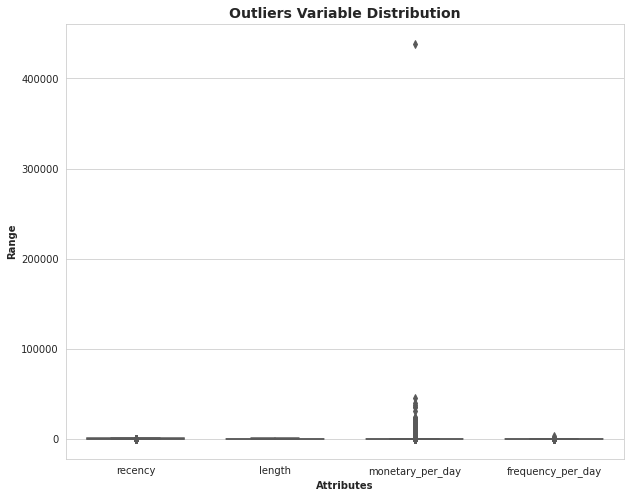

In [ ]:
# Outlier Analysis 

attributes = ['recency', 'length', 'monetary_per_day', 'frequency_per_day']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rlfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
rlfm_original = rlfm.copy()

In [ ]:
rlfm_original

merchant  recency  length  monetary_per_day  frequency_per_day
0      0002b63b92      135       1         33.790000           1.000000
1      0002d07bba      713      65         13.735077           0.061538
2      00057d4302      214      67          4.406119           0.417910
3      000bcff341      220       1         78.260000           1.000000
4      000ddbf0ca      152       1        102.990000           1.000000
...           ...      ...     ...               ...                ...
14344  ffd3e45675       25      23         31.576522           0.217391
14345  ffe1f6b51a      413     261         10.789885           0.203065
14346  ffe26b900d      689     335         28.630239           0.241791
14347  ffec05edb9      409      21          7.587619           0.142857
14348  fff1754102      723     505         10.568218           0.091089

[14349 rows x 5 columns]

In [ ]:
attributes = ['recency', 'length', 'monetary_per_day', 'frequency_per_day']

# Cleaning Outliers

In [ ]:
# Removing (statistical) outliers 
Q1 = rlfm.length.quantile(0.25)
Q3 = rlfm.length.quantile(0.75)
IQR = Q3 - Q1
rlfm = rlfm[(rlfm.length >= Q1 - 1.5*IQR) & (rlfm.length <= Q3 + 1.5*IQR)]

Q1 = rlfm.recency.quantile(0.25)
Q3 = rlfm.recency.quantile(0.75)
IQR = Q3 - Q1
rlfm = rlfm[(rlfm.recency >= Q1 - 1.5*IQR) & (rlfm.recency <= Q3 + 1.5*IQR)]
                                                                                    
Q1 = rlfm.frequency_per_day.quantile(0.25)
Q3 = rlfm.frequency_per_day.quantile(0.75)
IQR = Q3 - Q1
rlfm = rlfm[(rlfm.frequency_per_day >= Q1 - 1.5*IQR) & (rlfm.frequency_per_day <= Q3 + 1.5*IQR)]

Q1 = rlfm.monetary_per_day.quantile(0.25)
Q3 = rlfm.monetary_per_day.quantile(0.75)
IQR = Q3 - Q1
rlfm = rlfm[(rlfm.monetary_per_day >= Q1 - 1.5*IQR) & (rlfm.monetary_per_day <= Q3 + 1.5*IQR)]


Text(0.5, 0, 'Attributes')

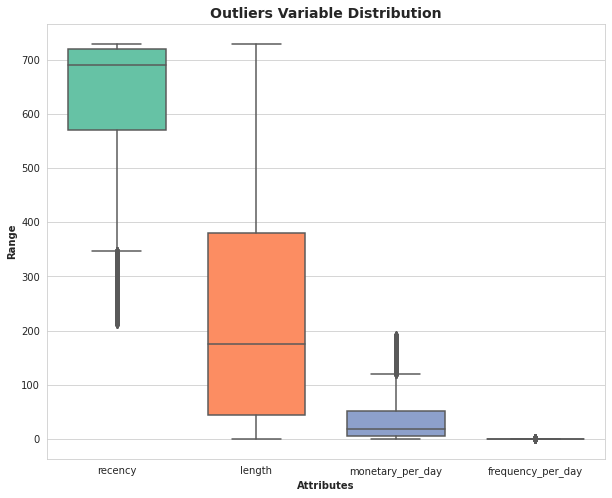

In [ ]:
# Outlier Analysis 

attributes = ['recency', 'length', 'monetary_per_day', 'frequency_per_day']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rlfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from datetime import datetime
import datetime as dt

# Standardization/Normalization

In [ ]:
# Rescaling the attributes
lrfm_df = rlfm[['recency', 'length', 'monetary_per_day', 'frequency_per_day']]

# Instantiate
scaler = StandardScaler()

# fit_transform
lrfm_df_scaled = scaler.fit_transform(lrfm_df)
lrfm_df_scaled.shape

(11210, 4)

In [ ]:
lrfm_df_scaled = pd.DataFrame(lrfm_df_scaled)
lrfm_df_scaled.columns = ['recency', 'length', 'monetary_per_day', 'frequency_per_day']
lrfm_df_scaled.head()

recency    length  monetary_per_day  frequency_per_day
0  0.675289 -0.806763         -0.525113          -0.604711
1 -3.178573 -0.796832         -0.740986           0.215146
2 -3.132234 -1.124554          0.968000           1.554280
3  0.605780  2.132797         -0.262763          -0.529184
4  0.791136  1.139703          0.906585           0.713592

Text(0.5, 0, 'Attributes')

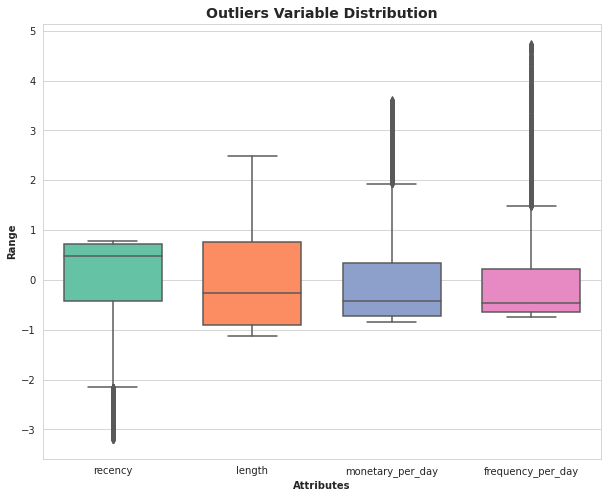

In [ ]:
# Outlier Analysis 

attributes = ['recency', 'length', 'monetary_per_day', 'frequency_per_day']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = lrfm_df_scaled[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

# K-Means Clustering with Automated K value

In [ ]:
l = []

# Elbow Method and Visualization

# Distortion Method

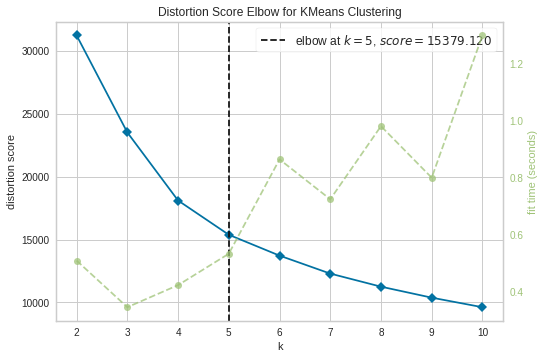

In [ ]:
# Distortion Method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10))

visualizer.fit(lrfm_df_scaled)     
visualizer.show()  

In [ ]:
l.append(visualizer.elbow_value_)

# Calinski_harabasz Method

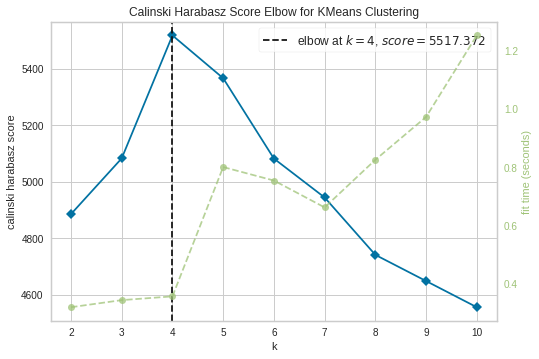

In [ ]:
# Calinski_harabasz Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10), metric='calinski_harabasz')

visualizer.fit(lrfm_df_scaled)        
visualizer.show()  

In [ ]:
l.append(visualizer.elbow_value_)

# Silhouette Method

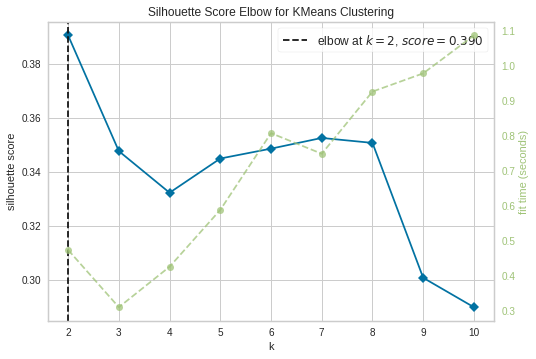

In [ ]:
# Silhouette Method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(10), metric='silhouette')

visualizer.fit(lrfm_df_scaled)        
visualizer.show() 

In [ ]:
l.append(visualizer.elbow_value_)

In [ ]:
print(max(set(l), key = l.count))

2


In [ ]:
avg = sum(l)/len(l)
print("The average is ", round(avg))

The average is  4


# Auto K Value with Majority Vote

In [ ]:
# Final model with k=4
kmeans = KMeans(n_clusters=round(avg), max_iter=100)
kmeans.fit(lrfm_df_scaled)

KMeans(max_iter=100, n_clusters=4)

In [ ]:
kmeans.labels_

array([3, 2, 2, ..., 0, 2, 0], dtype=int32)

In [ ]:
# assign the label
rlfm['Cluster_Id'] = kmeans.labels_
rlfm.head()

merchant  recency  length  monetary_per_day  frequency_per_day  \
1  0002d07bba      713      65         13.735077           0.061538   
2  00057d4302      214      67          4.406119           0.417910   
3  000bcff341      220       1         78.260000           1.000000   
5  000ed1585f      704     657         25.072557           0.094368   
6  000f8c3297      728     457         75.605930           0.634573   

   Cluster_Id  
1           3  
2           2  
3           2  
5           0  
6           0

In [ ]:
lrfm_df_scaled['Cluster_Id'] = kmeans.labels_
lrfm_df_scaled.head()

recency    length  monetary_per_day  frequency_per_day  Cluster_Id
0  0.675289 -0.806763         -0.525113          -0.604711           3
1 -3.178573 -0.796832         -0.740986           0.215146           2
2 -3.132234 -1.124554          0.968000           1.554280           2
3  0.605780  2.132797         -0.262763          -0.529184           0
4  0.791136  1.139703          0.906585           0.713592           0


# Clusters and Segmentation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


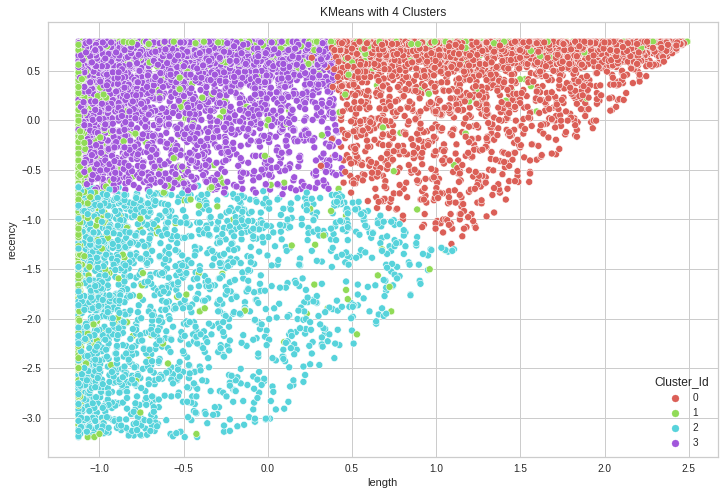

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(lrfm_df_scaled['length'], lrfm_df_scaled['recency'], hue=lrfm_df_scaled['Cluster_Id'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


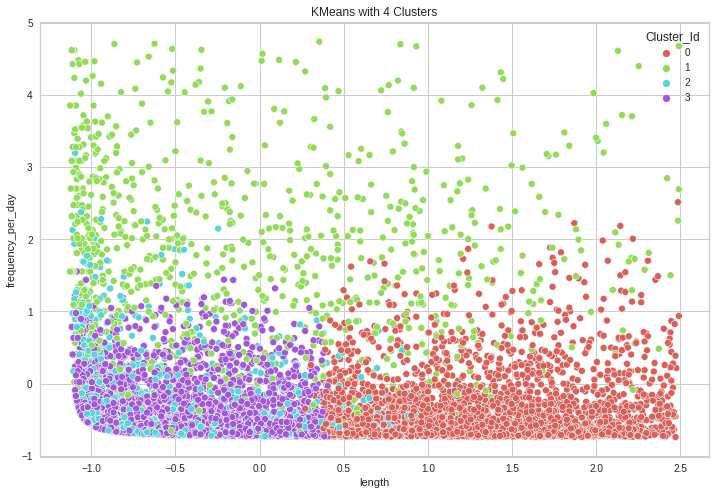

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(lrfm_df_scaled['length'], lrfm_df_scaled['frequency_per_day'], hue=lrfm_df_scaled['Cluster_Id'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

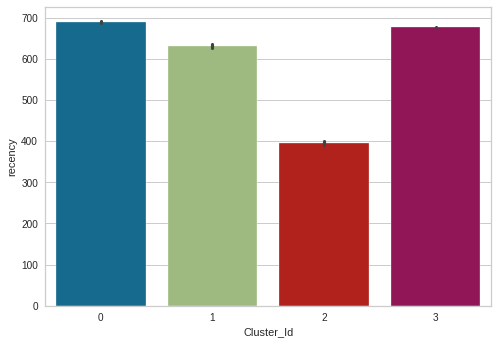

In [ ]:
sns.barplot(x='Cluster_Id', y='recency', data=rlfm)

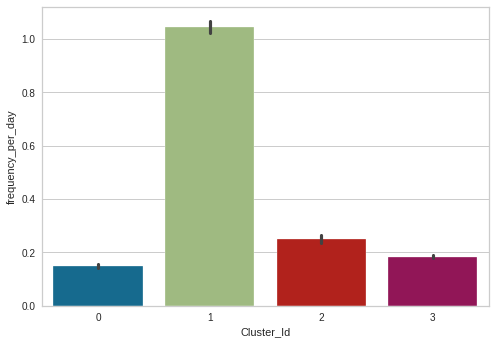

In [ ]:
sns.barplot(x='Cluster_Id', y='frequency_per_day', data=rlfm)

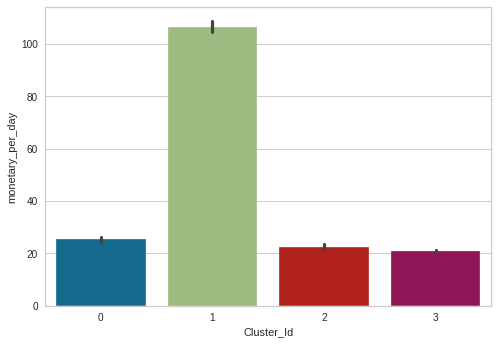

In [ ]:
sns.barplot(x='Cluster_Id', y='monetary_per_day', data=rlfm)

In [ ]:
enhanced_data = rlfm_original.copy()

In [ ]:
enhanced_data.shape

(14349, 5)

In [ ]:
enhanced_data

merchant  recency  length  monetary_per_day  frequency_per_day
0      0002b63b92      135       1         33.790000           1.000000
1      0002d07bba      713      65         13.735077           0.061538
2      00057d4302      214      67          4.406119           0.417910
3      000bcff341      220       1         78.260000           1.000000
4      000ddbf0ca      152       1        102.990000           1.000000
...           ...      ...     ...               ...                ...
14344  ffd3e45675       25      23         31.576522           0.217391
14345  ffe1f6b51a      413     261         10.789885           0.203065
14346  ffe26b900d      689     335         28.630239           0.241791
14347  ffec05edb9      409      21          7.587619           0.142857
14348  fff1754102      723     505         10.568218           0.091089

[14349 rows x 5 columns]

# Median Spend Per Transaction Amount

In [ ]:
merchant_wise = {'merchant':[], 'median_amount_at_merchant':[]}
for merchant_id in tqdm(data['merchant'].unique()):
    merchant_wise['merchant'].append(merchant_id)
    median = data[data['merchant'] == merchant_id]['amount_usd_in_cents'].median()
    merchant_wise['median_amount_at_merchant'].append(median)
curr = pd.DataFrame(merchant_wise)

  0%|          | 0/14349 [00:00<?, ?it/s]

In [ ]:
curr

merchant  median_amount_at_merchant
0      faa029c6b0                    145.990
1      ed7a7d91aa                     64.920
2      5608f200cf                      8.200
3      15b1a0d61e                     44.660
4      4770051790                    288.545
...           ...                        ...
14344  41f6054841                     12.330
14345  cce748c02b                   4065.280
14346  9506efbbbd                    135.360
14347  7dd807a637                    313.610
14348  314ea3d710                     20.680

[14349 rows x 2 columns]

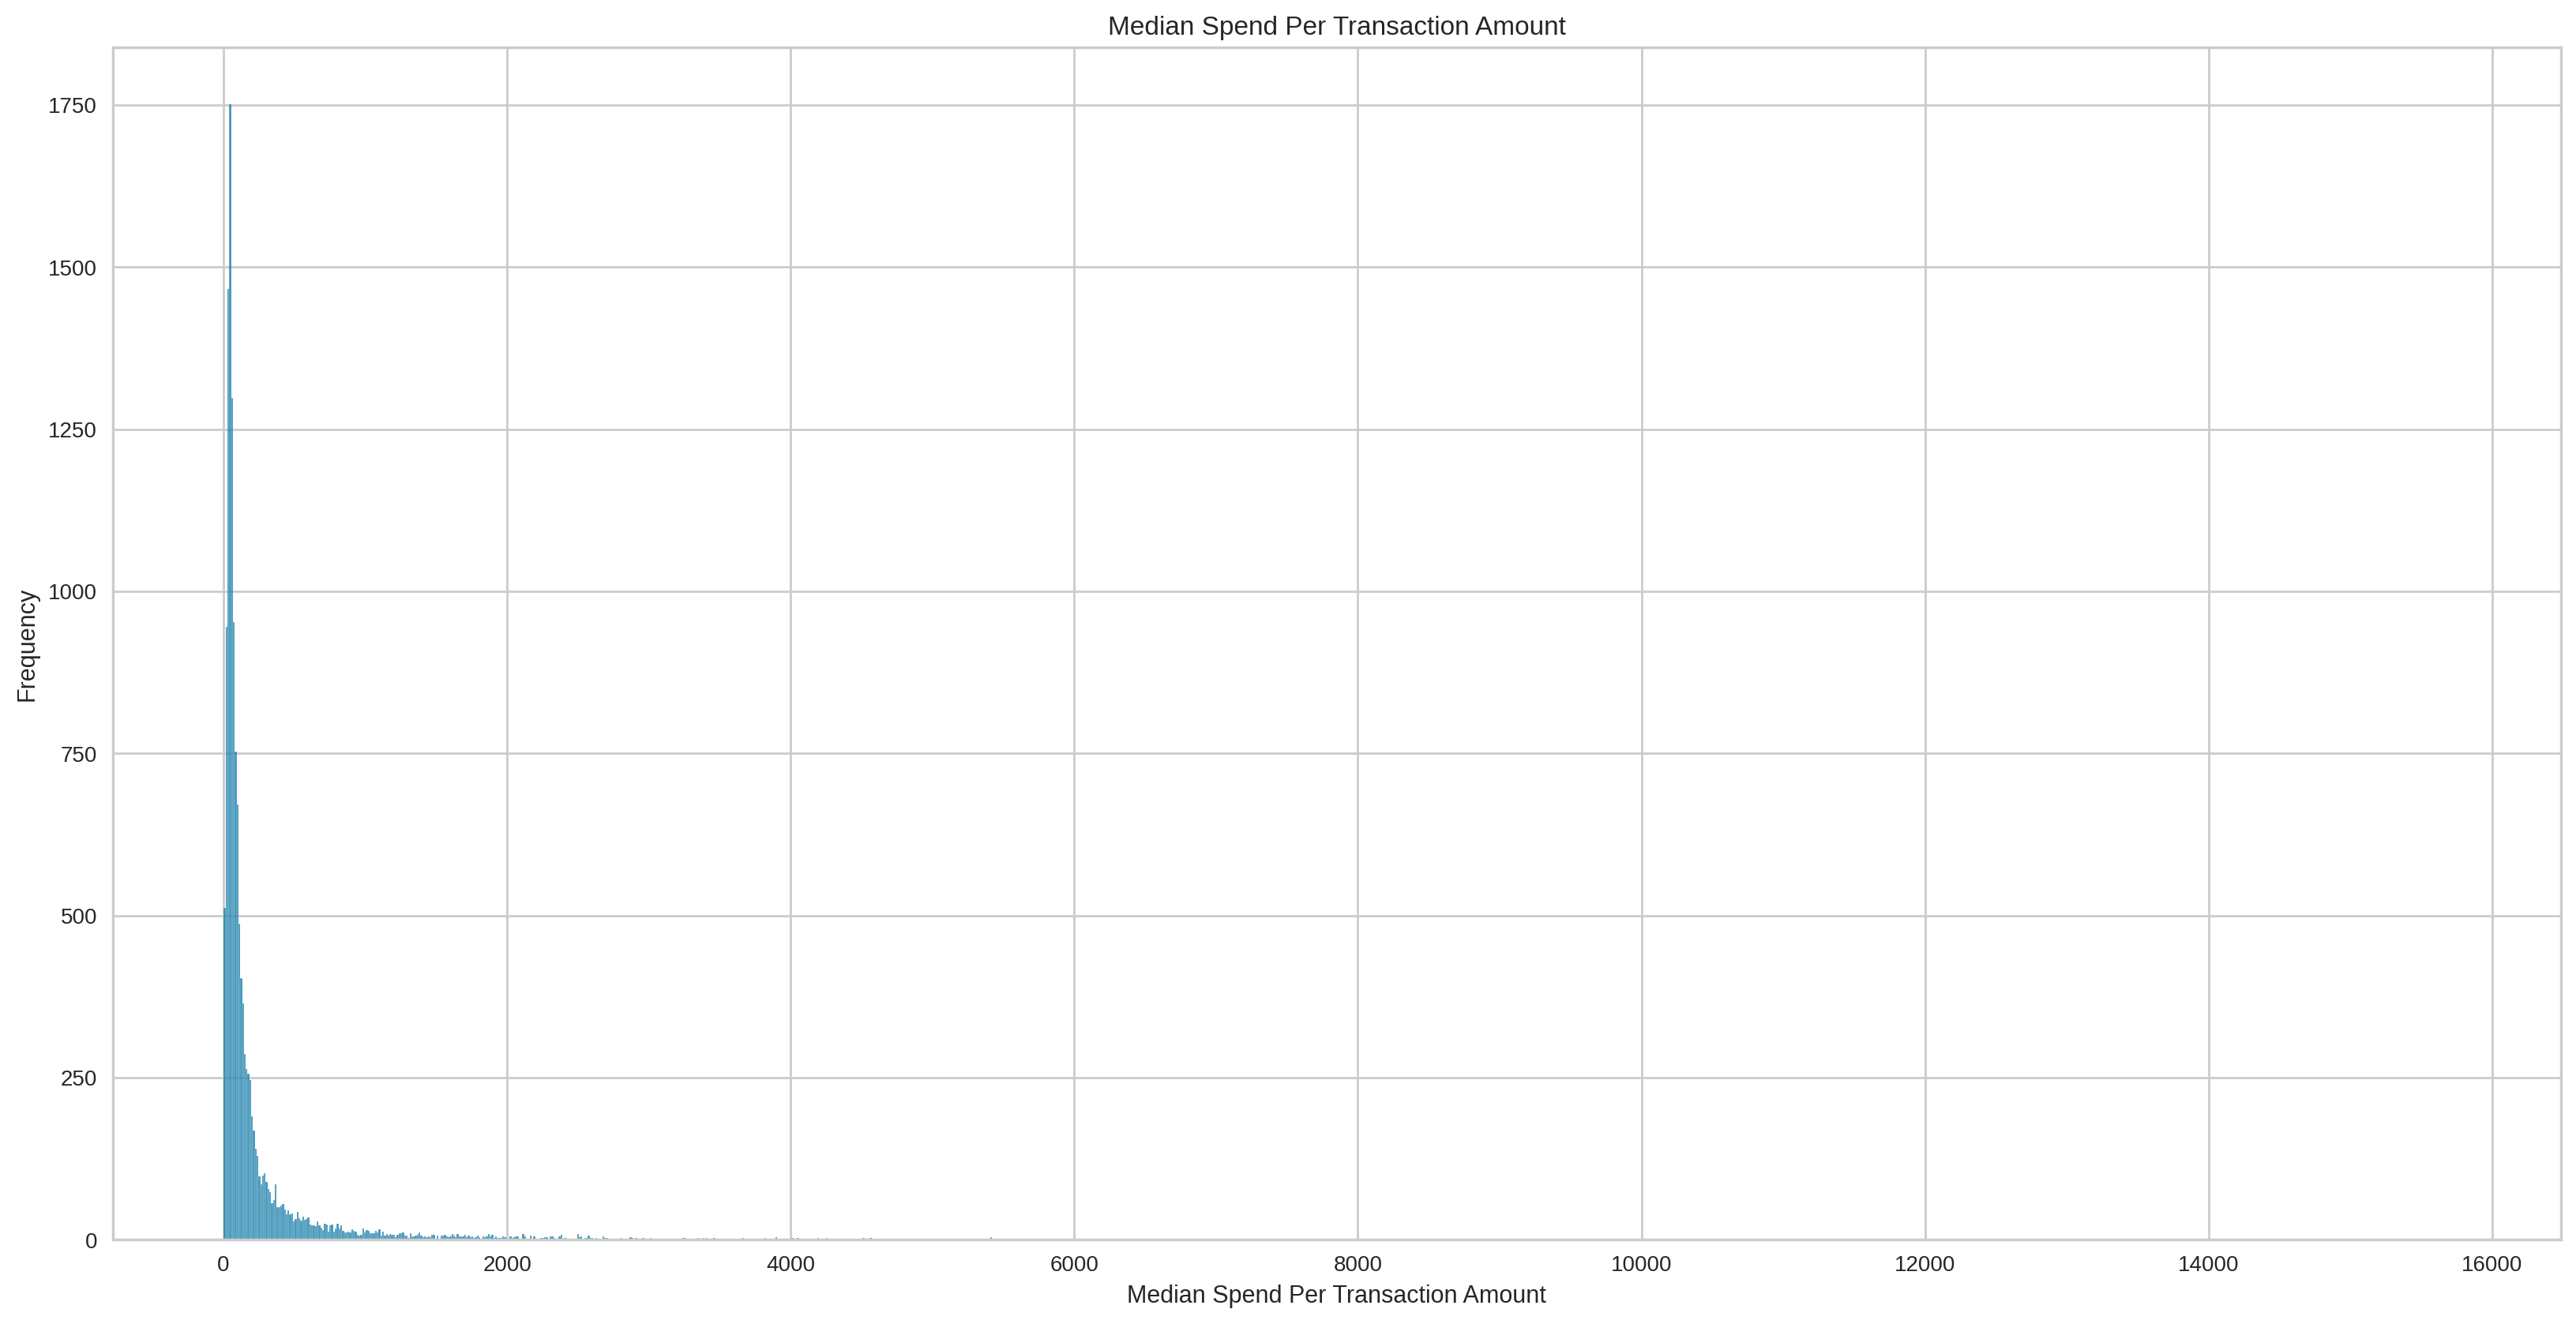

In [ ]:
plt.figure(figsize=(20,10), dpi=200)
sns.histplot(curr['median_amount_at_merchant'])
plt.xlabel('Median Spend Per Transaction Amount')
plt.ylabel('Frequency')
plt.title('Median Spend Per Transaction Amount')
plt.show()

In [ ]:
fig = px.histogram(curr['median_amount_at_merchant'],
                   labels={'value':'Median Spend Per Transaction Amount',
                           'count':'Frequency'},
                   title='Median Spend Per Transaction Amount',
                   nbins=100)
fig.show()

# Median Monthly Spend Per Transaction Amount

In [ ]:
merchant_wise = {'merchant':[], 'median_monthly_spend':[]}
for merchant_id in tqdm(data['merchant'].unique()):
    merchant_wise['merchant'].append(merchant_id)
    sel_data = data[data['merchant'] == merchant_id]
    sel_data['month'] = sel_data['time'].apply(lambda x:x.month)
    median = sel_data.groupby('month').sum()['amount_usd_in_cents'].median()
    merchant_wise['median_monthly_spend'].append(median)
curr = pd.DataFrame(merchant_wise)

  0%|          | 0/14349 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



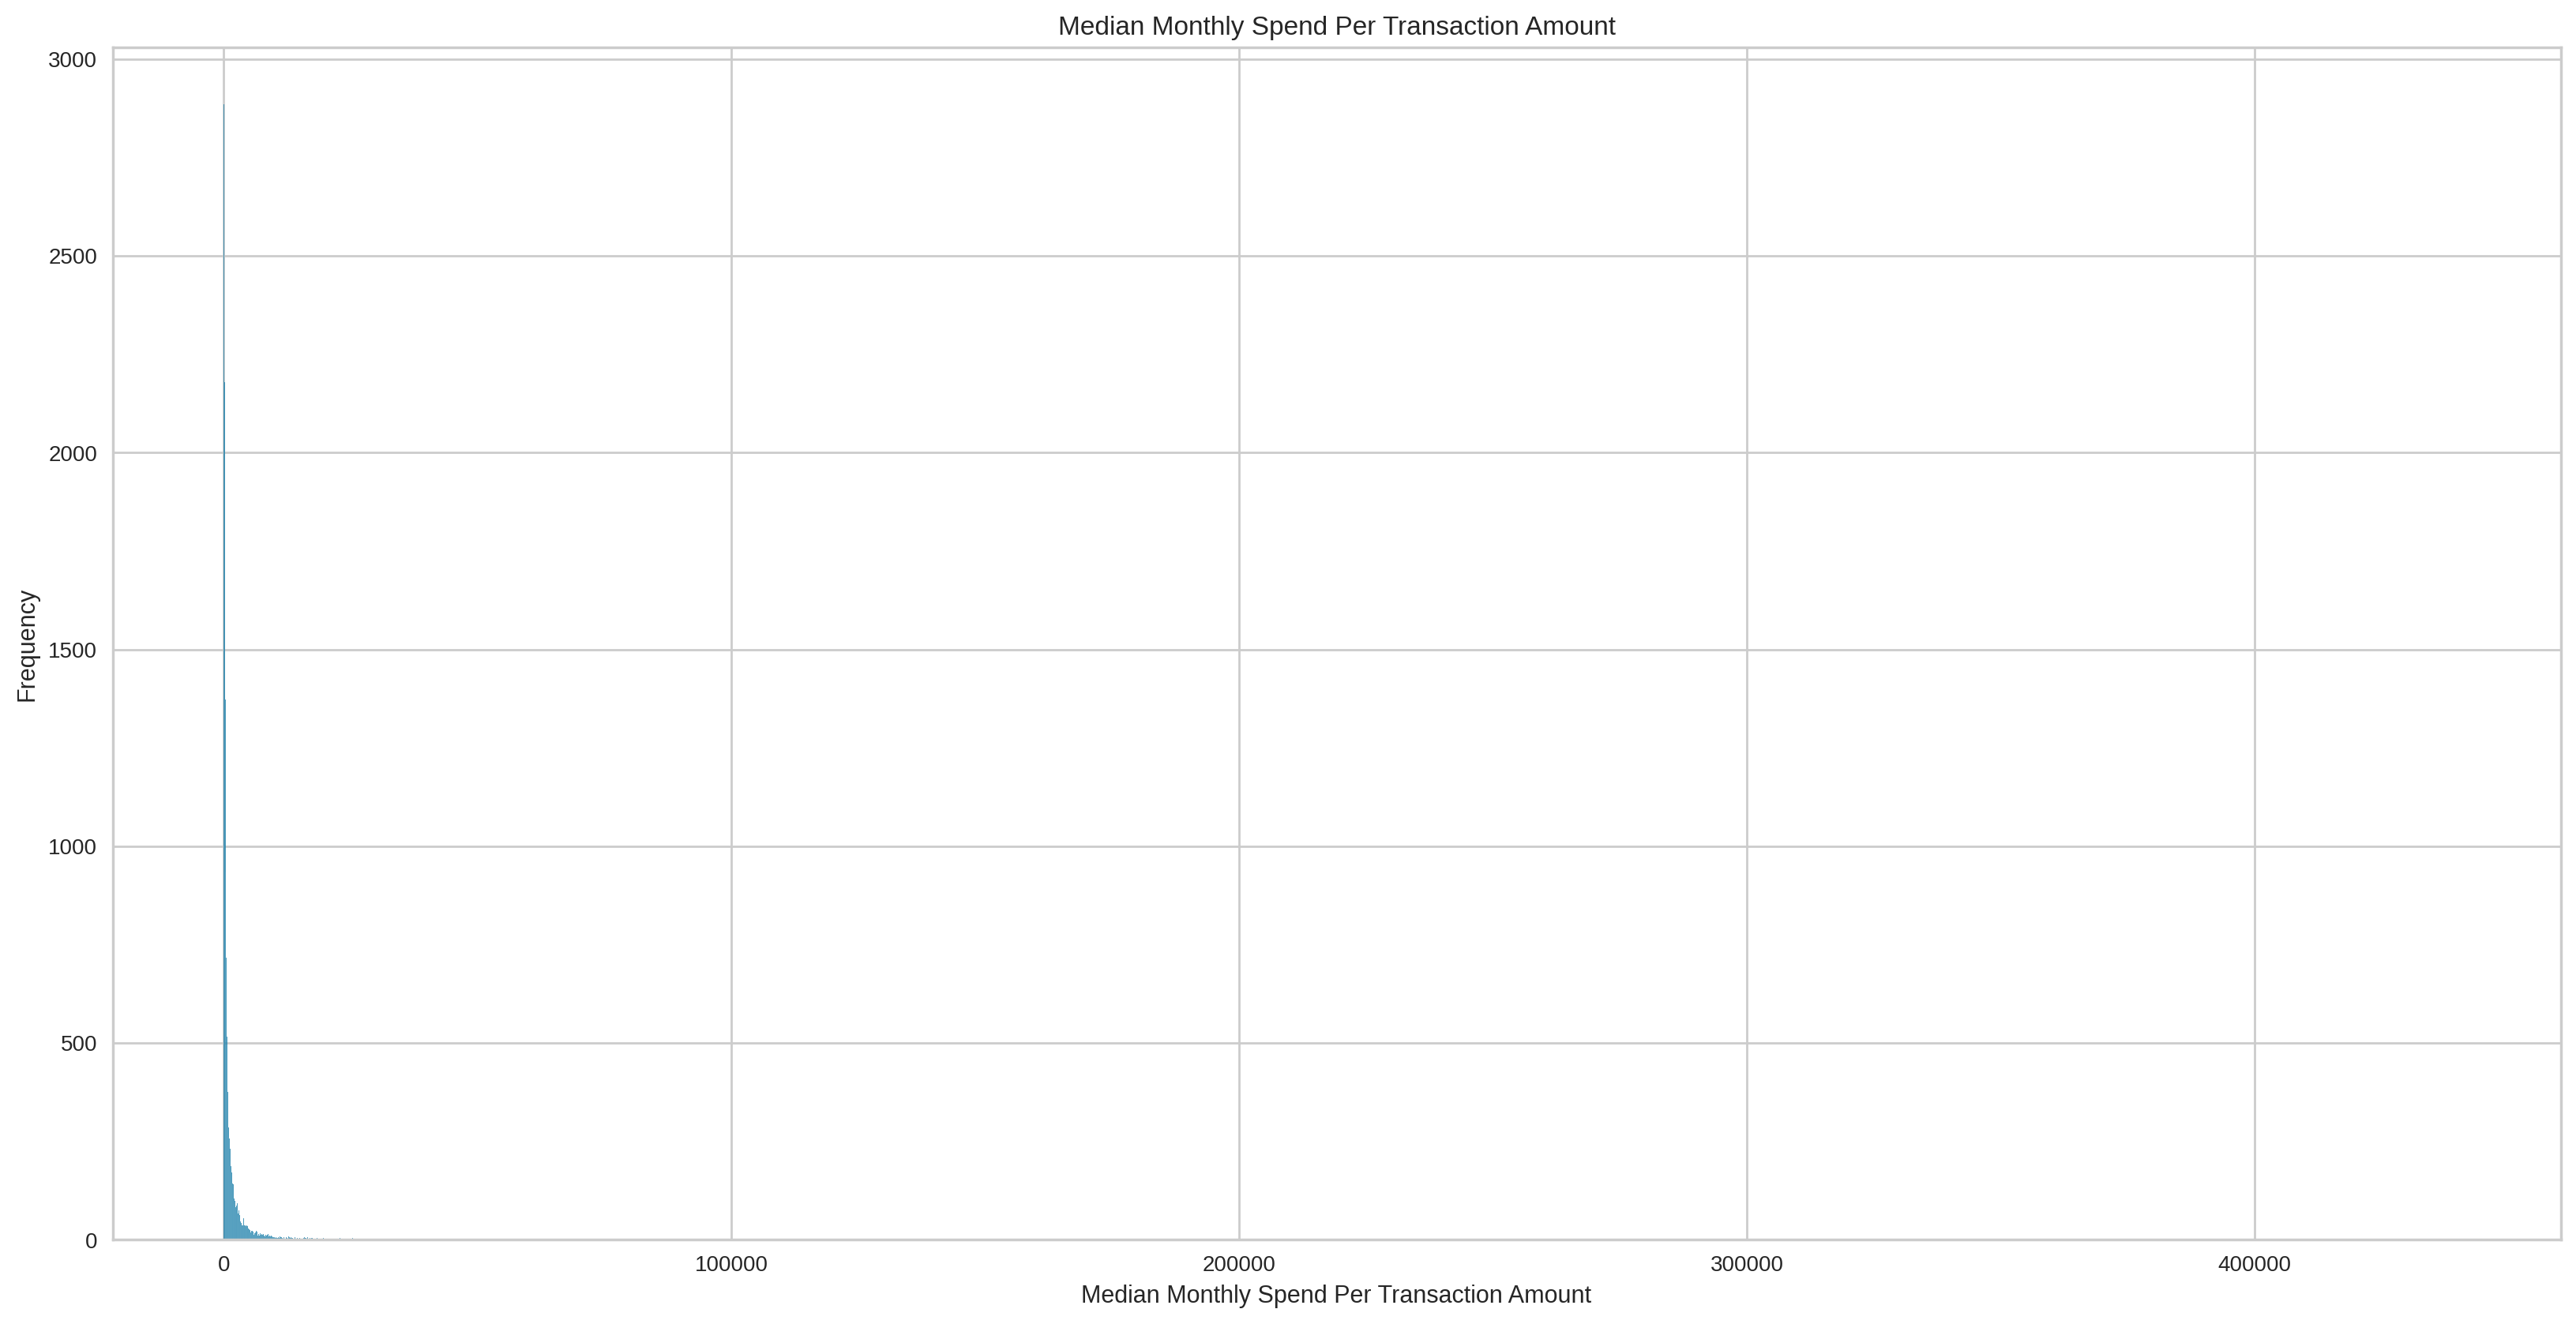

In [ ]:
plt.figure(figsize=(20,10), dpi=200)
sns.histplot(curr['median_monthly_spend'])
plt.xlabel('Median Monthly Spend Per Transaction Amount')
plt.ylabel('Frequency')
plt.title('Median Monthly Spend Per Transaction Amount')
plt.show()

In [ ]:
fig = px.histogram(curr['median_monthly_spend'],
                   labels={'value':'Median Monthly Spend Per Transaction Amount',
                           'count':'Frequency'},
                   title='Median Monthly Spend Amount',
                   nbins=100)
fig.show()

In [ ]:
merchant_wise = {'merchant':[], 'median_amount':[]}
for merchant_id in tqdm(data['merchant'].unique()):
    merchant_wise['merchant'].append(merchant_id)
    sel_data = data[data['merchant'] == merchant_id]
    sel_data['month'] = sel_data['time'].apply(lambda x:x.month)
    median = sel_data.groupby('month').size().median()
    merchant_wise['median_amount'].append(median)
curr = pd.DataFrame(merchant_wise)

  0%|          | 0/14349 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Median Number of Monthly Transactions

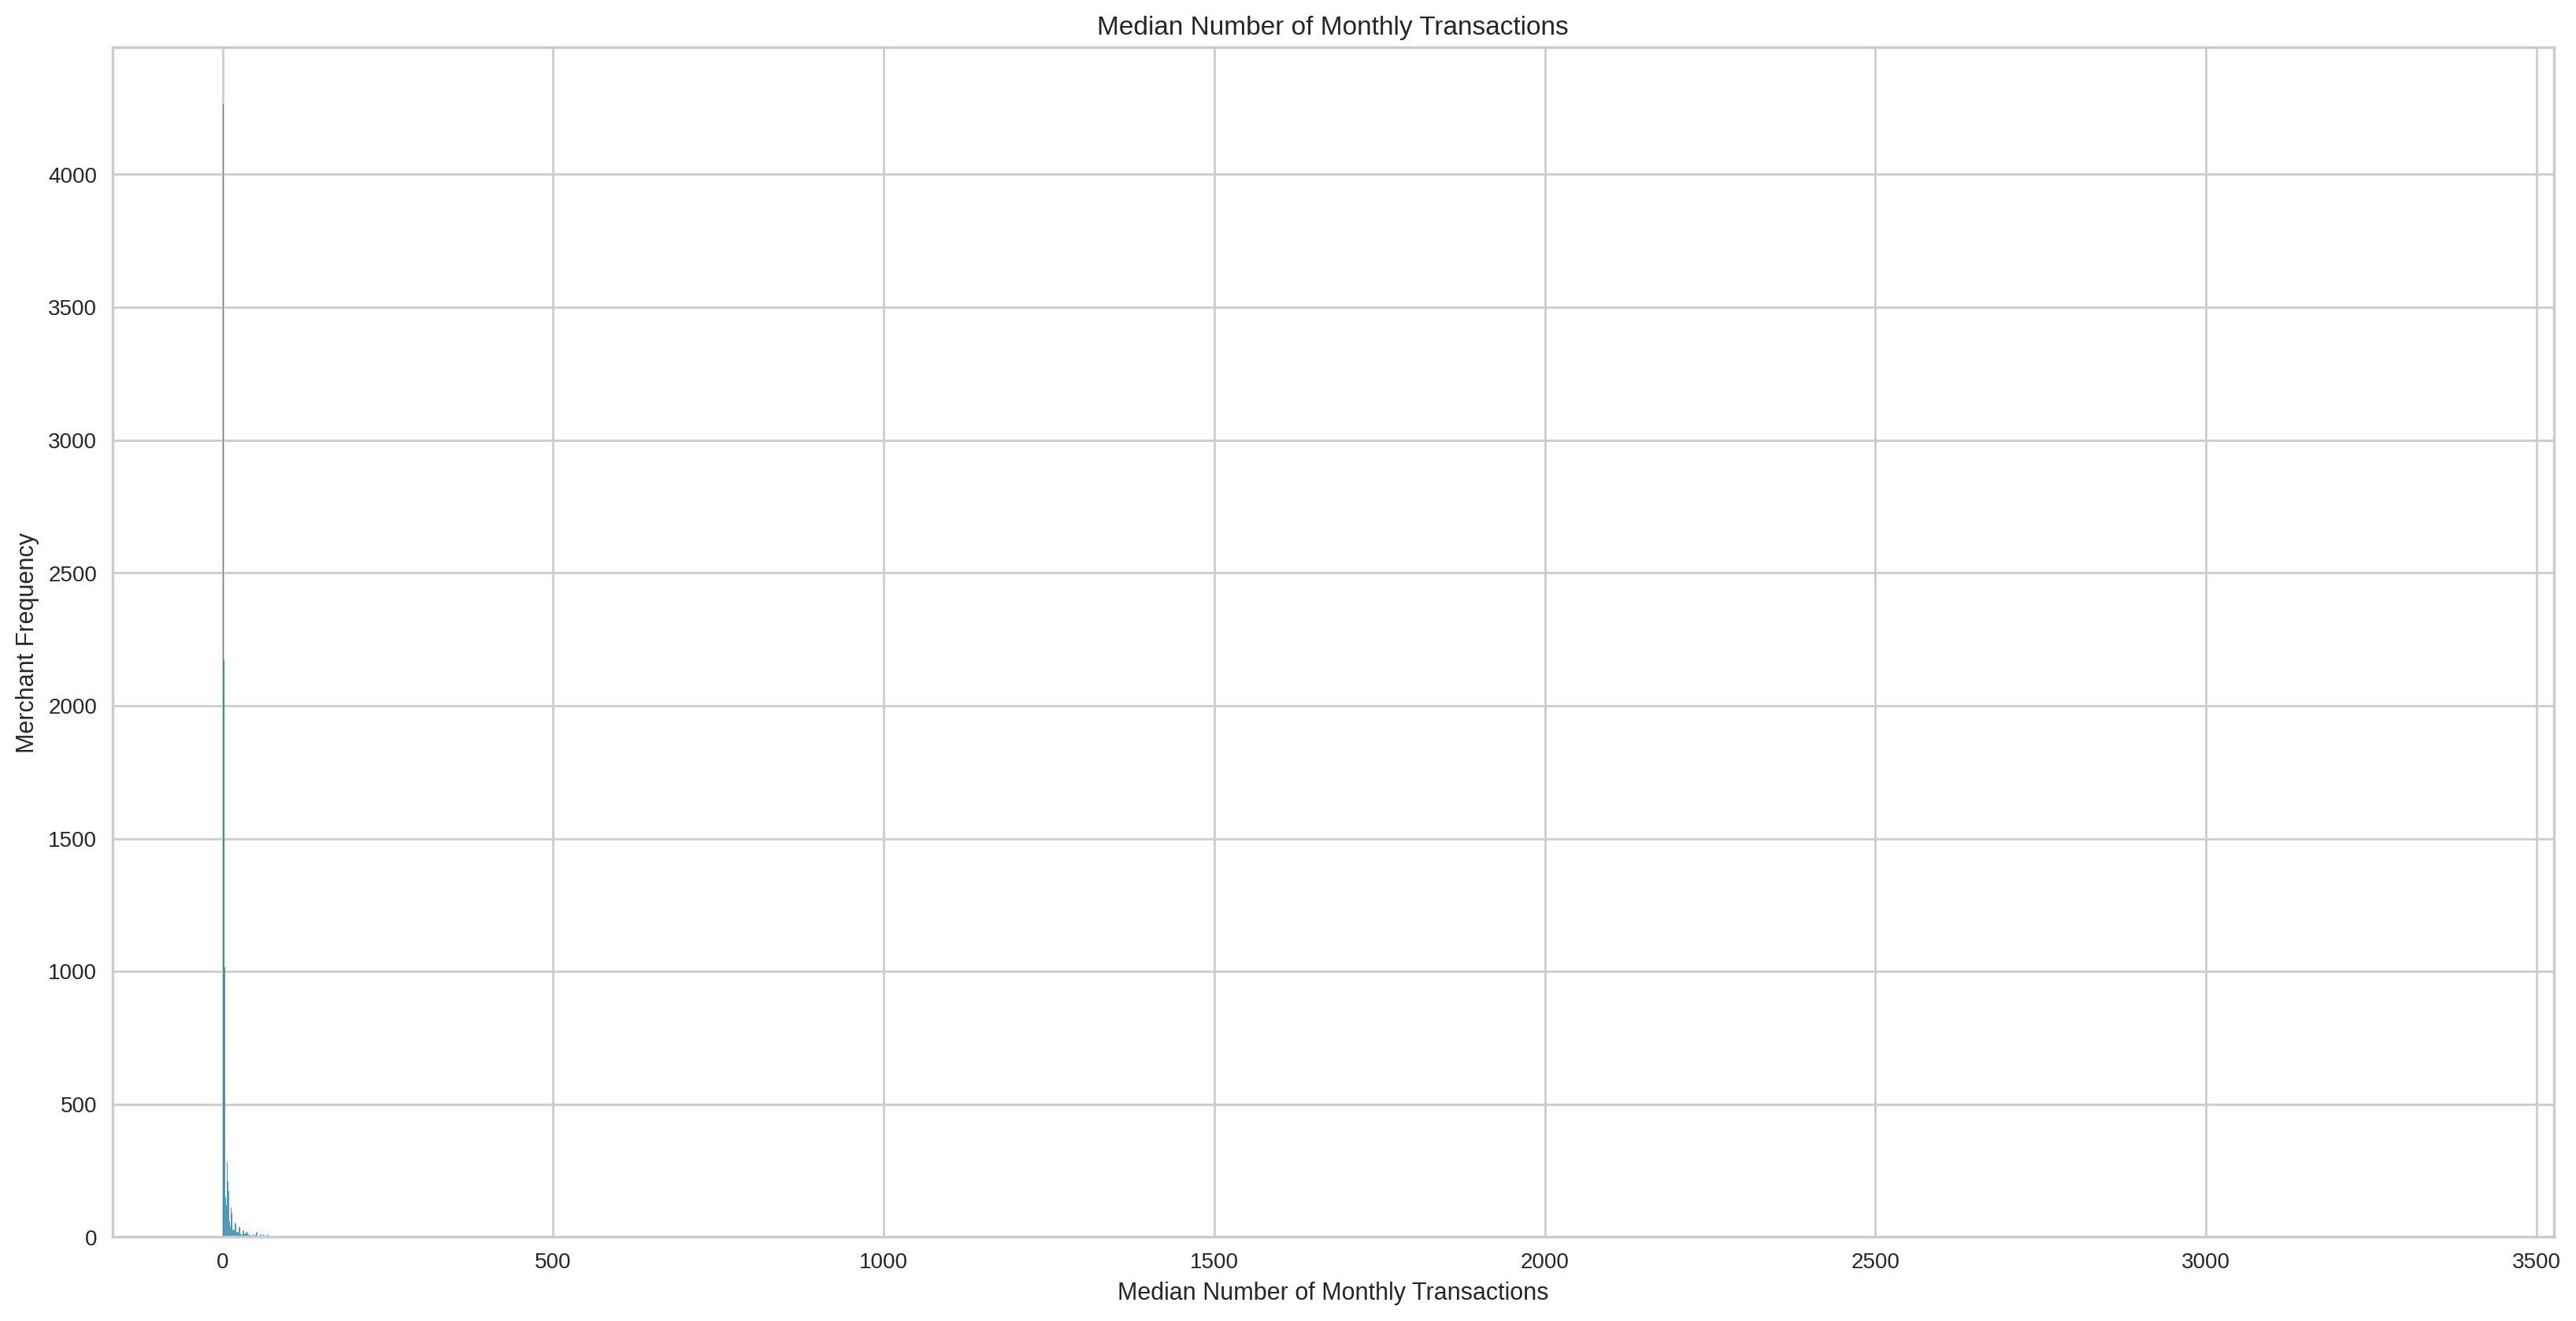

In [ ]:
plt.figure(figsize=(20,10), dpi=200)
sns.histplot(curr['median_amount'])
plt.xlabel('Median Number of Monthly Transactions')
plt.ylabel('Merchant Frequency')
plt.title('Median Number of Monthly Transactions')
plt.show()

In [ ]:
fig = px.histogram(curr['median_amount'],
                   labels={'value':'Median Number of Monthly Transactions',
                           'count':'Merchant Frequency'},
                   title='Median Number of Monthly Transactions',
                   nbins=100)
fig.show()

# Merchant Tenure

In [ ]:
diff = lambda start_date, end_date: (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)

merchant_wise = {'merchant':[], 'tenure':[]}
for merchant_id in tqdm(data['merchant'].unique()):
    merchant_wise['merchant'].append(merchant_id)
    sel_data = data[data['merchant'] == merchant_id]['time'].sort_values()
    first, last = sel_data[sel_data.index[0]], sel_data[sel_data.index[-1]]
    merchant_wise['tenure'].append(diff(first, last))
curr = pd.DataFrame(merchant_wise)

  0%|          | 0/14349 [00:00<?, ?it/s]

In [ ]:
curr

merchant  tenure
0      faa029c6b0      16
1      ed7a7d91aa      13
2      5608f200cf      21
3      15b1a0d61e      14
4      4770051790       8
...           ...     ...
14344  41f6054841       0
14345  cce748c02b       0
14346  9506efbbbd       0
14347  7dd807a637       0
14348  314ea3d710       0

[14349 rows x 2 columns]

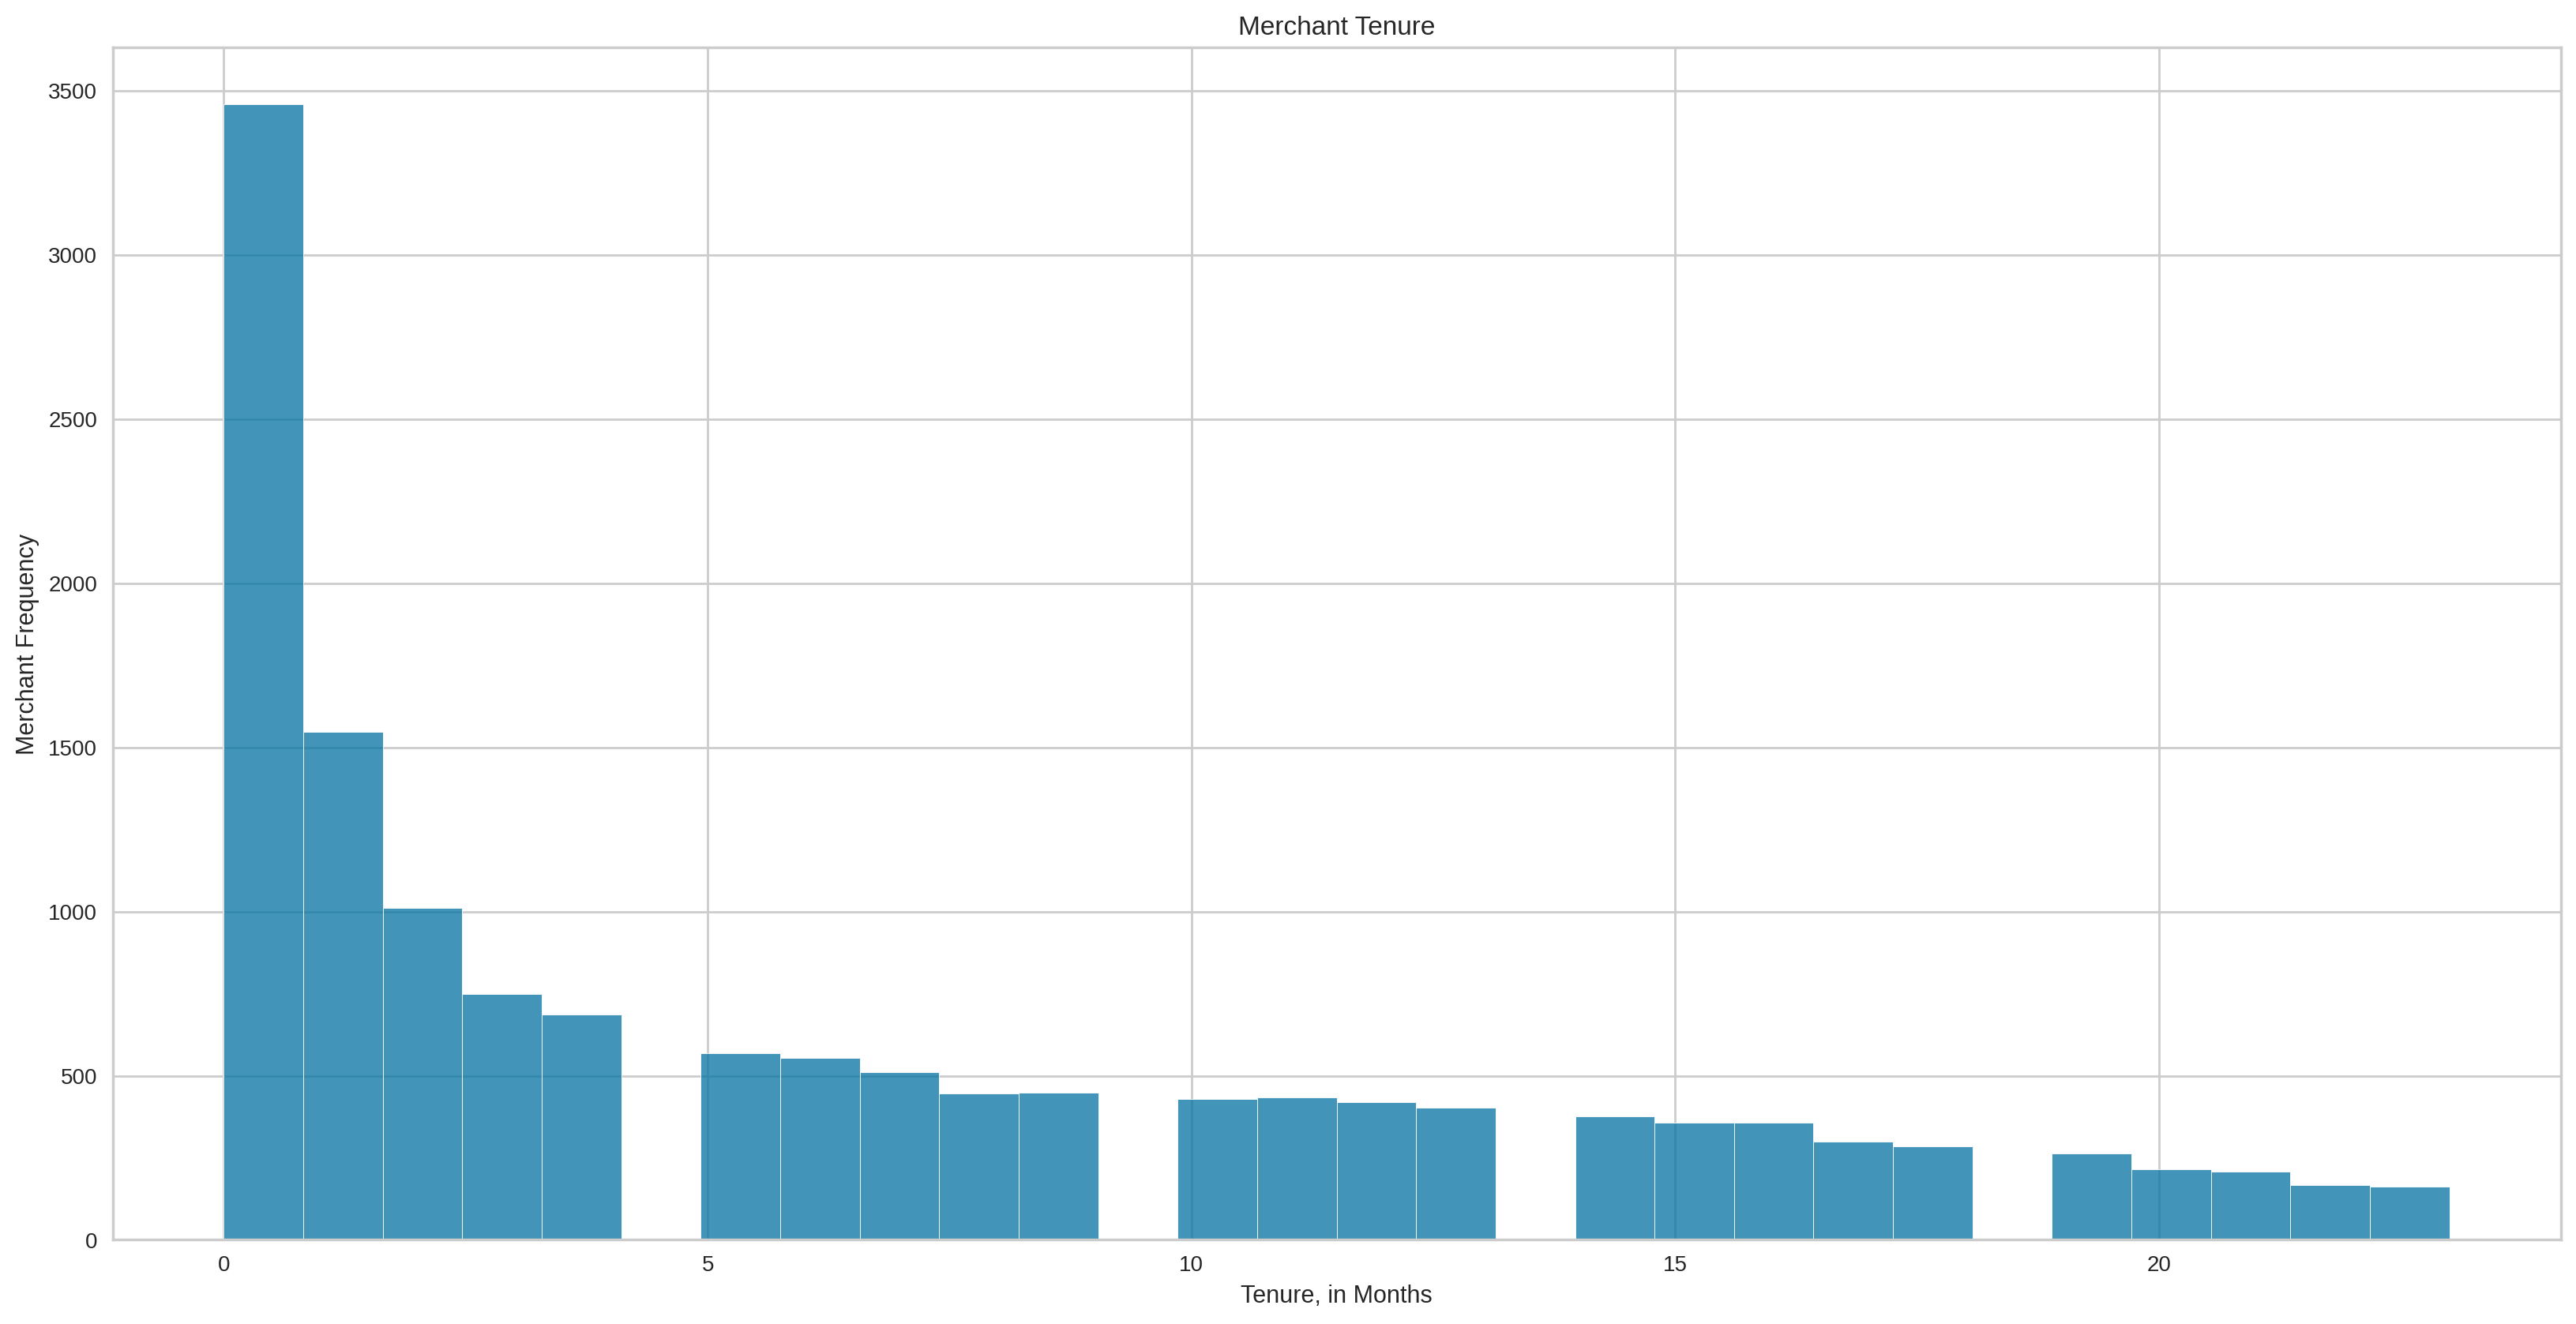

In [ ]:
plt.figure(figsize=(20,10), dpi=200)
sns.histplot(curr['tenure'])
plt.xlabel('Tenure, in Months')
plt.ylabel('Merchant Frequency')
plt.title('Merchant Tenure')
plt.show()

In [ ]:
fig = px.histogram(curr['tenure'],
                   labels={'value':'Tenure, in Months',
                           'count':'Merchant Frequency'},
                   title='Merchant Tenure',
                   nbins=100)
fig.show()

In [ ]:
import datetime
data['time'] = pd.to_datetime(data['time'])

# **Type of Merchants and More Feature Engineering**


In [ ]:
data['time_comp'] = data['time'].apply(lambda x:x.time())

merchants = {'merchant':[],
              'day merchants':[],
             'night merchants':[],
             'weekend merchants':[],
             'weekday merchants':[],
             'restaurant merchants':[],
             'breakfast merchants':[],
             'median spend level':[],
            'Q1':[],
             'Q2':[],
             'Q3':[],
             'Q4':[]}

def day_func(time):
    if datetime.time(6,0) < time < datetime.time(18,0):
        return True
    return False

def night_func(time):
    if time < datetime.time(6,0) or time > datetime.time(18,0):
        return True
    return False

def restaurant_func(time):
    if datetime.time(11,0) < time < datetime.time(13,0) or datetime.time(18,0) < time < datetime.time(20,0):
        return True
    return False

def breakfast_func(time):
    if datetime.time(7,0) < time < datetime.time(9,0):
        return True
    return False

def weekend_func(time):
    if time.weekday() >= 5:
        return True
    return False

def weekday_func(time):
    if time.weekday() < 5:
        return True
    return False

def get_quarter(time):
    return time.month % 12 // 3 + 1

for merchant_id in tqdm(data['merchant'].unique()):
    
    sel_data = data[data['merchant'] == merchant_id].reset_index().drop('index', axis=1)

    merchants['merchant'].append(merchant_id)
    
    # day merchant
    merchants['day merchants'].append(sum(sel_data['time_comp'].apply(day_func)) / len(sel_data))
        
    # night merchant=
    merchants['night merchants'].append(sum(sel_data['time_comp'].apply(night_func)) / len(sel_data))
        
    # weekend merchant
    merchants['weekend merchants'].append(sum(sel_data['time'].apply(weekend_func)) / len(sel_data))
        
    # weekday merchant
    merchants['weekday merchants'].append(sum(sel_data['time'].apply(weekday_func)) / len(sel_data))
        
    # holiday merchant
    counts = pd.value_counts(sel_data['time'].apply(get_quarter))
    for quarter in [1,2,3,4]:
        if quarter not in counts.index:
            merchants[f'Q{quarter}'].append(0)
        else:
            merchants[f'Q{quarter}'].append(counts[quarter] / len(sel_data))
    
    # restaurant merchant
    merchants['restaurant merchants'].append(sum(sel_data['time_comp'].apply(restaurant_func)) / len(sel_data))
        
    # breakfast merchant
    merchants['breakfast merchants'].append(sum(sel_data['time_comp'].apply(breakfast_func)) / len(sel_data))
        
    # median spend level
    merchants['median spend level'].append(sel_data['amount_usd_in_cents'].median())
        
cluster = pd.DataFrame(merchants)

# # read in cluster data (previously derived to save time)
# cluster = pd.read_csv('/kaggle/input/stripeclustering/merchants-data.csv')
# cluster.drop('Unnamed: 0', axis=1, inplace=True)
cluster.head()

  0%|          | 0/14349 [00:00<?, ?it/s]

merchant  day merchants  night merchants  weekend merchants  \
0  faa029c6b0       0.356618         0.643382           0.306985   
1  ed7a7d91aa       0.187500         0.812500           0.312500   
2  5608f200cf       0.287041         0.712919           0.288805   
3  15b1a0d61e       0.136276         0.863724           0.174664   
4  4770051790       0.531359         0.468641           0.294425   

   weekday merchants  restaurant merchants  breakfast merchants  \
0           0.693015              0.165441             0.007353   
1           0.687500              0.125000             0.000000   
2           0.711195              0.124177             0.024733   
3           0.825336              0.207294             0.000000   
4           0.705575              0.233449             0.001742   

   median spend level        Q1        Q2        Q3        Q4  
0             145.990  0.261029  0.154412  0.187500  0.397059  
1              64.920  0.687500  0.187500  0.000000  0.125000  
2               8.200  0.216604  0.223659  0.285082  0.274655  
3              44.660  0.266795  0.203455  0.241843  0.287908  
4             288.545  0.059233  0.228223  0.665505  0.047038

In [ ]:
cluster

merchant  day merchants  night merchants  weekend merchants  \
0      faa029c6b0       0.356618         0.643382           0.306985   
1      ed7a7d91aa       0.187500         0.812500           0.312500   
2      5608f200cf       0.287041         0.712919           0.288805   
3      15b1a0d61e       0.136276         0.863724           0.174664   
4      4770051790       0.531359         0.468641           0.294425   
...           ...            ...              ...                ...   
14344  41f6054841       0.000000         1.000000           1.000000   
14345  cce748c02b       1.000000         0.000000           0.000000   
14346  9506efbbbd       0.000000         1.000000           0.000000   
14347  7dd807a637       1.000000         0.000000           0.000000   
14348  314ea3d710       0.000000         1.000000           0.000000   

       weekday merchants  restaurant merchants  breakfast merchants  \
0               0.693015              0.165441             0.007353   
1               0.687500              0.125000             0.000000   
2               0.711195              0.124177             0.024733   
3               0.825336              0.207294             0.000000   
4               0.705575              0.233449             0.001742   
...                  ...                   ...                  ...   
14344           0.000000              0.000000             0.000000   
14345           1.000000              0.000000             0.000000   
14346           1.000000              0.000000             0.000000   
14347           1.000000              0.000000             0.000000   
14348           1.000000              0.000000             0.000000   

       median spend level        Q1        Q2        Q3        Q4  
0                 145.990  0.261029  0.154412  0.187500  0.397059  
1                  64.920  0.687500  0.187500  0.000000  0.125000  
2                   8.200  0.216604  0.223659  0.285082  0.274655  
3                  44.660  0.266795  0.203455  0.241843  0.287908  
4                 288.545  0.059233  0.228223  0.665505  0.047038  
...                   ...       ...       ...       ...       ...  
14344              12.330  0.000000  1.000000  0.000000  0.000000  
14345            4065.280  0.000000  0.000000  1.000000  0.000000  
14346             135.360  0.000000  0.000000  0.000000  1.000000  
14347             313.610  1.000000  0.000000  0.000000  0.000000  
14348              20.680  0.000000  0.000000  1.000000  0.000000  

[14349 rows x 12 columns]

In [ ]:
enhanced_data.head()

merchant  recency  length  monetary_per_day  frequency_per_day
0  0002b63b92      135       1         33.790000           1.000000
1  0002d07bba      713      65         13.735077           0.061538
2  00057d4302      214      67          4.406119           0.417910
3  000bcff341      220       1         78.260000           1.000000
4  000ddbf0ca      152       1        102.990000           1.000000

In [ ]:
cluster_save = cluster.copy()

In [ ]:
cluster = cluster_save.merge(enhanced_data, on = 'merchant', how = 'inner')

In [ ]:
cluster.head()

merchant  day merchants  night merchants  weekend merchants  \
0  faa029c6b0       0.356618         0.643382           0.306985   
1  ed7a7d91aa       0.187500         0.812500           0.312500   
2  5608f200cf       0.287041         0.712919           0.288805   
3  15b1a0d61e       0.136276         0.863724           0.174664   
4  4770051790       0.531359         0.468641           0.294425   

   weekday merchants  restaurant merchants  breakfast merchants  \
0           0.693015              0.165441             0.007353   
1           0.687500              0.125000             0.000000   
2           0.711195              0.124177             0.024733   
3           0.825336              0.207294             0.000000   
4           0.705575              0.233449             0.001742   

   median spend level        Q1        Q2        Q3        Q4  recency  \
0             145.990  0.261029  0.154412  0.187500  0.397059      728   
1              64.920  0.687500  0.187500  0.000000  0.125000      724   
2               8.200  0.216604  0.223659  0.285082  0.274655      728   
3              44.660  0.266795  0.203455  0.241843  0.287908      728   
4             288.545  0.059233  0.228223  0.665505  0.047038      728   

   length  monetary_per_day  frequency_per_day  
0     510        178.453255           1.066667  
1     394          6.886701           0.040609  
2     642        325.725405          39.738318  
3     429         70.020932           1.214452  
4     265        981.021811           2.166038

In [ ]:
cluster.shape

(14349, 15)

In [ ]:
cluster.drop('merchant', axis=1, inplace=True)


In [ ]:
cluster.drop('recency', axis=1, inplace=True)


# **Visualize High Dimensional Data with T-distributed Stochastic Neighbor Embedding.**


In [ ]:
from sklearn.manifold import TSNE
embeddings = TSNE(n_components = 2).fit_transform(cluster)
fig = px.scatter(x=embeddings[:,0],
                 y=embeddings[:,1],
                 custom_data=[cluster[col] for col in cluster.columns],
                 title='Dimensionality Reduction')
fig.update_traces(
    hovertemplate="<br>".join([
        col + ': %{customdata[' + str(i) + ']}' for i, col in enumerate(cluster.columns)
    ])
)
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# **Defining Churn in Merchant Transaction Case, which stopped processing with Stripe**


In [ ]:
diff = lambda start_date: (2034 - start_date.year) * 12 + (12 - start_date.month)

curr = []
for i, merchant_id in tqdm(enumerate(data['merchant'].unique())):
    
    sel_data = data[data['merchant'] == merchant_id]['time'].sort_values()
    if diff(sel_data[sel_data.index[0]]) >= 3:
        last = sel_data[sel_data.index[-1]]
        curr.append(diff(last))
    else:
        cluster.drop(i, inplace=True)
        
curr = pd.Series(curr)

0it [00:00, ?it/s]

# **Assigning Label for Classification and A Baseline Model for Churn Prediction - Decision Tree**


In [ ]:
cluster.head()

day merchants  night merchants  weekend merchants  weekday merchants  \
0       0.356618         0.643382           0.306985           0.693015   
1       0.187500         0.812500           0.312500           0.687500   
2       0.287041         0.712919           0.288805           0.711195   
3       0.136276         0.863724           0.174664           0.825336   
4       0.531359         0.468641           0.294425           0.705575   

   restaurant merchants  breakfast merchants  median spend level        Q1  \
0              0.165441             0.007353             145.990  0.261029   
1              0.125000             0.000000              64.920  0.687500   
2              0.124177             0.024733               8.200  0.216604   
3              0.207294             0.000000              44.660  0.266795   
4              0.233449             0.001742             288.545  0.059233   

         Q2        Q3        Q4  length  monetary_per_day  frequency_per_day  
0  0.154412  0.187500  0.397059     510        178.453255           1.066667  
1  0.187500  0.000000  0.125000     394          6.886701           0.040609  
2  0.223659  0.285082  0.274655     642        325.725405          39.738318  
3  0.203455  0.241843  0.287908     429         70.020932           1.214452  
4  0.228223  0.665505  0.047038     265        981.021811           2.166038

In [ ]:
labels = (curr >= 3).apply(int)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(cluster, labels,
                                                                          test_size=0.2)
model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

print(sklearn.metrics.precision_score(y_train, model.predict(X_train)))
print(sklearn.metrics.recall_score(y_train, model.predict(X_train)))
print(sklearn.metrics.precision_score(y_val, model.predict(X_val)))
print(sklearn.metrics.recall_score(y_val, model.predict(X_val)))
sklearn.metrics.confusion_matrix(y_val, model.predict(X_val))

1.0
1.0
0.832014072119613
0.8240418118466899


array([[1098,  191],
       [ 202,  946]])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
!pip install imblearn
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# **Rigorous Modelling and 4 Model Comparisons while Highlighting Important Features**


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(cluster, labels, test_size = 0.20)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

9744 2437
9744 2437


# **Python Class for Training and Testing Various Models**


In [ ]:
class TrainAndEval:

  def __init__(self, clf, X_train, y_train, X_test, y_test):
    self.clf = clf
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test

  def train(self):
    return self.clf.fit(self.X_train, self.y_train)

  def eval(self):
    y_pred = self.clf.predict(self.X_test)
    tn, fp, fn, tp = confusion_matrix(self.y_test,y_pred).ravel()
    print('True Negatives:', tn)
    print('False Positives:', fp)
    print('False Negatives:', fn)
    print('True Positives:', tp)
    print(classification_report(self.y_test,y_pred))

# **Hyperparameters Tuning with Grid Search CV**


# **Gradient Boosting Classifier**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': [10, 50, 125, 500], 'max_depth': [1, 3, 5], 
          'learning_rate': [0.05, 0.1, 0.5, 0.9]}
grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state = 0), param_grid=params, cv=5, verbose=3)
grid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.849 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.834 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.839 total time=   0.3s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.806 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.847 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.853 total time=   0.9s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.834 total time=   0.9s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.842 total time=   0.9s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.857 total time=   0.9s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.848 total t

In [ ]:
clf = grid.best_estimator_
GBT = TrainAndEval(clf, X_train, y_train, X_test, y_test)
GBT.eval()

True Negatives: 1157
False Positives: 110
False Negatives: 195
True Positives: 975
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1267
           1       0.90      0.83      0.86      1170

    accuracy                           0.87      2437
   macro avg       0.88      0.87      0.87      2437
weighted avg       0.88      0.87      0.87      2437



# **XG Boost Classifier**


In [ ]:

params = {'n_estimators': [10, 50, 125, 500], 'max_depth': [1, 3, 5], 
          'learning_rate': [0.05, 0.1, 0.5,  0.9]
        }

gridXGB = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=5, verbose=3)
gridXGB = gridXGB.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.849 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.834 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.839 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.861 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.848 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.850 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.835 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.844 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.861 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.848 total t

In [ ]:
gridXGB = gridXGB.best_estimator_
XGB = TrainAndEval(gridXGB, X_train, y_train, X_test, y_test)
XGB.eval()

True Negatives: 1162
False Positives: 105
False Negatives: 201
True Positives: 969
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1267
           1       0.90      0.83      0.86      1170

    accuracy                           0.87      2437
   macro avg       0.88      0.87      0.87      2437
weighted avg       0.88      0.87      0.87      2437



In [ ]:
cluster_saving = cluster.copy()

# **Dropping LFM Features for now to compare why these features are so impactful**


In [ ]:
cluster.drop('length', axis=1, inplace=True)
cluster.drop('monetary_per_day', axis=1, inplace=True)
cluster.drop('frequency_per_day', axis=1, inplace=True)



# **A Decision Tree without LFM Features**


In [ ]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(cluster, labels,
                                                                          test_size=0.2)

model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

print(sklearn.metrics.precision_score(y_train, model.predict(X_train)))
print(sklearn.metrics.recall_score(y_train, model.predict(X_train)))
print(sklearn.metrics.precision_score(y_val, model.predict(X_val)))
print(sklearn.metrics.recall_score(y_val, model.predict(X_val)))
sklearn.metrics.confusion_matrix(y_val, model.predict(X_val))

1.0
1.0
0.7761452031114953
0.7741379310344828


array([[1018,  259],
       [ 262,  898]])

# **Model Performance with LFM is really significant**


In [ ]:
cluster['length'] = cluster_saving['length']
cluster['monetary_per_day'] = cluster_saving['monetary_per_day']

cluster['frequency_per_day'] = cluster_saving['frequency_per_day']


In [ ]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(cluster, labels,
                                                                          test_size=0.2)

In [ ]:
model = sklearn.tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

print(sklearn.metrics.precision_score(y_train, model.predict(X_train)))
print(sklearn.metrics.recall_score(y_train, model.predict(X_train)))
print(sklearn.metrics.precision_score(y_val, model.predict(X_val)))
print(sklearn.metrics.recall_score(y_val, model.predict(X_val)))
sklearn.metrics.confusion_matrix(y_val, model.predict(X_val))

1.0
1.0
0.8270742358078602
0.8249128919860628


array([[1091,  198],
       [ 201,  947]])

In [ ]:
cluster2 = cluster_saving.copy()

In [ ]:
cluster2['labels'] = labels

# **Classification Labels are almost Balanced, so not to worry in terms of Accuracy as a Metric**


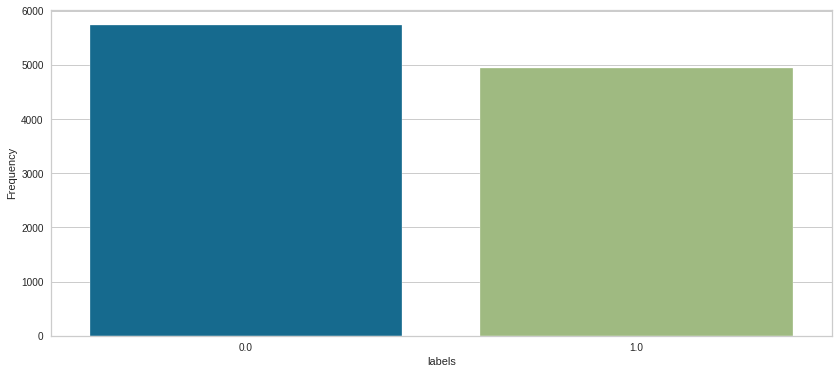

In [ ]:
e=pd.DataFrame(cluster2.labels.value_counts()).reset_index(drop=False)
e.columns=['labels','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="labels", y="Frequency", data=e) # draw barplot

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(cluster, labels,
                                                                          test_size=0.2)

# **2 Models Comparison based on Precision, Recall, F1 Score and Accuracy Measure**



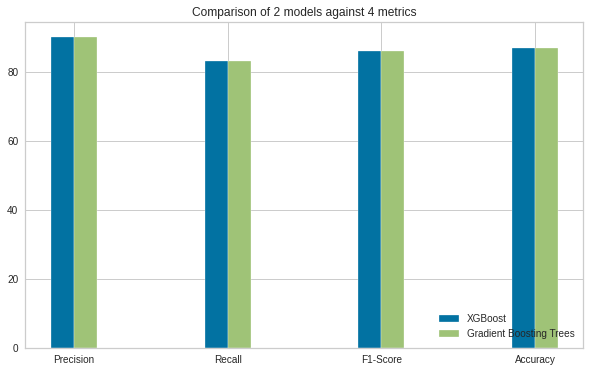

In [ ]:
XAxis = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
XGBValues = [90,83,86,87]
GBTValues = [90,83,86,87]

bar_width = 0.15
index = np.arange(4)

fig, ax = plt.subplots()
XGB = ax.bar(index,XGBValues, width=bar_width, label = "XGBoost") 
GBT = ax.bar(index+bar_width,GBTValues, width=bar_width, label = "Gradient Boosting Trees") 


ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Comparison of 2 models against 4 metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(XAxis)
ax.legend(loc = 'lower right')

fig.set_size_inches(10,6)

plt.show()

fig.savefig('MetricsModels.png',dpi = 200)

# **Further Improvements and Remarks:**



*   **Other Clustering techniques can also help significantly in analyzing the dataset. The best methods can be hierarchical clustering (agglomerative vs divisive). Isolation Forest can also be tried.**


*   **Principal Component Analysis can also be tried to reduce dimensions and still maintaing the variance and compare results** 


*   **Nothing beats the quality of data. So running test-statistics could also help in analyzing the data further or obtaining additional features**

*   **Important data acquisition ( either by client, business teams or an external API) and rigorous feature engineering.**


*   **Better way to handle outliers. In case of large number of records people use Auto-encoders as well.**


*   **Exploring neural networks side of modeling and particularly Recurrent Neural Networks to see if there can be any further context between next and previous transactions.**


*   **Discussing with other team members and doing simulation based behavioral analysis to understand the processes further, if any important attribute can be added**

*   **Checking for data quality in terms of days like Cyber-Monday or Thanksgiving or any sales.**


*   **Time series based anomaly detection in the dataset and then modeling it appropriately**


*   **More business knowledge to incorporate that information inside the models**

*   **Analyzing False Negative, True Negative, True Positive and False Positive carefully to further enhance and fine-tune the used models.**